<a href="https://colab.research.google.com/github/Fattaah88/UAS-BDDM/blob/main/RESPONSI_BDDM_UAS_22_11_4814_Fattaah_Herdansyah_Alhamiid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install scikit-learn
!pip install nltk
!pip install contractions
!pip install textblob
!pip install wordcloud

In [35]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [36]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [37]:
# Standard Libraries
import os
import re
import string

# External Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from textblob import TextBlob
import contractions

# Set up seaborn for enhanced visualization
sns.set()

In [38]:
file_id = '1R1CKd9eJ3O1_kGS_6ZG2roYPzBzFWCZ1'
url = f'https://drive.google.com/uc?id={file_id}'
output_path = '/content/Sarcasm_Headlines_Dataset.json'
if not os.path.exists(output_path):
    gdown.download(url, output_path, quiet=False)
else:
    print(f"The file '{output_path}' already exists.")

The file '/content/Sarcasm_Headlines_Dataset.json' already exists.


In [39]:
file_id = '1LF_M6OhaorSJUkt3-dq8GGyKTpWQSQIi'
url = f'https://drive.google.com/uc?id={file_id}'
output_path2 = '/content/Sarcasm_Headlines_Dataset_v2.json'
if not os.path.exists(output_path2):
    gdown.download(url, output_path2, quiet=False)
else:
    print(f"The file '{output_path2}' already exists.")

The file '/content/Sarcasm_Headlines_Dataset_v2.json' already exists.


In [40]:
df1 = pd.read_json(output_path, lines=True)
df1.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [41]:
df2 = pd.read_json(output_path2, lines=True)
df2.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [44]:
df = pd.concat([df1, df2], axis=0)
df = df.reindex(columns=['is_sarcastic', 'headline', 'article_link'])
df.head()

,is_sarcastic,headline,article_link
0,0,former versace store clerk sues over secret 'b...,https://www.huffingtonpost.com/entry/versace-b...
1,0,the 'roseanne' revival catches up to our thorn...,https://www.huffingtonpost.com/entry/roseanne-...
2,1,mom starting to fear son's web series closest ...,https://local.theonion.com/mom-starting-to-fea...
3,1,"boehner just wants wife to listen, not come up...",https://politics.theonion.com/boehner-just-wan...
4,0,j.k. rowling wishes snape happy birthday in th...,https://www.huffingtonpost.com/entry/jk-rowlin...


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55328 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  55328 non-null  int64 
 1   headline      55328 non-null  object
 2   article_link  55328 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


#**Visualisasi**

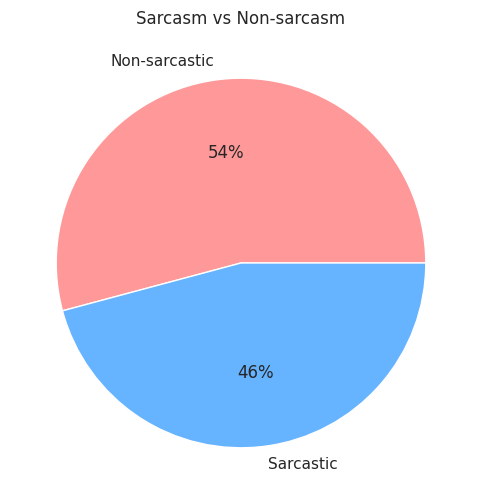

In [46]:
plt.figure(figsize=(8, 6))
# pie plot
plt.pie(df['is_sarcastic'].value_counts(), labels=['Non-sarcastic', 'Sarcastic'], autopct='%1.0f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Sarcasm vs Non-sarcasm')
plt.show()

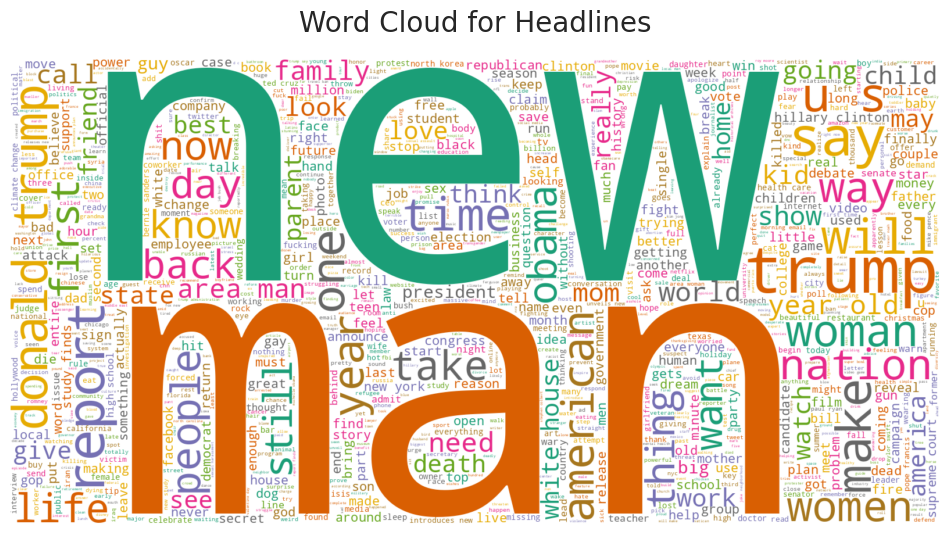

In [47]:
# Set a nice color palette
color_map = 'Dark2'

# Create a figure and set its size
plt.figure(figsize=(12, 8))

# Generate the word cloud
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',  # Background color
    colormap=color_map,        # Color scheme
    contour_color='black',     # Contour color
).generate(" ".join(df['headline']))

# Display the word cloud with interpolation for smoother edges
plt.imshow(wc, interpolation='bilinear')

# Turn off axis
plt.axis('off')

# Add a title
plt.title('Word Cloud for Headlines', fontsize=20, pad=20)

# Show the plot
plt.show()

#**Feature Engineering**

In [48]:
## Subjectivity score
df['subjectivity'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

,is_sarcastic,headline,article_link,subjectivity
0,0,former versace store clerk sues over secret 'b...,https://www.huffingtonpost.com/entry/versace-b...,0.377778
1,0,the 'roseanne' revival catches up to our thorn...,https://www.huffingtonpost.com/entry/roseanne-...,0.400000
2,1,mom starting to fear son's web series closest ...,https://local.theonion.com/mom-starting-to-fea...,0.100000
3,1,"boehner just wants wife to listen, not come up...",https://politics.theonion.com/boehner-just-wan...,0.100000
4,0,j.k. rowling wishes snape happy birthday in th...,https://www.huffingtonpost.com/entry/jk-rowlin...,0.833333


<ipython-input-49-e5a7a168d93e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_sarcastic', y='subjectivity', data=df, palette='viridis')


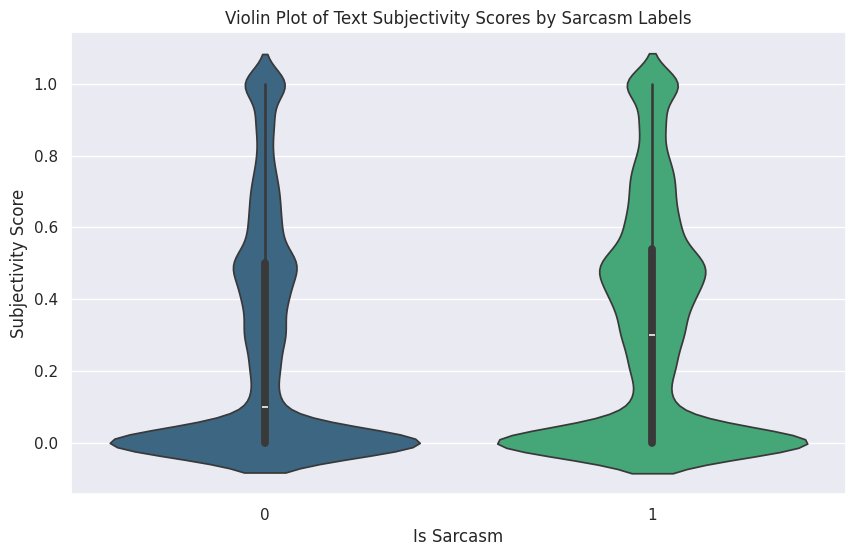

In [49]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_sarcastic', y='subjectivity', data=df, palette='viridis')

# Set labels and title
plt.title('Violin Plot of Text Subjectivity Scores by Sarcasm Labels')
plt.xlabel('Is Sarcasm')
plt.ylabel('Subjectivity Score')

# Show the plot
plt.show()

#** EDA**

<ipython-input-69-6c2f2ff842a4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_sarcastic', y='headline_length', data=df, palette='Set2')


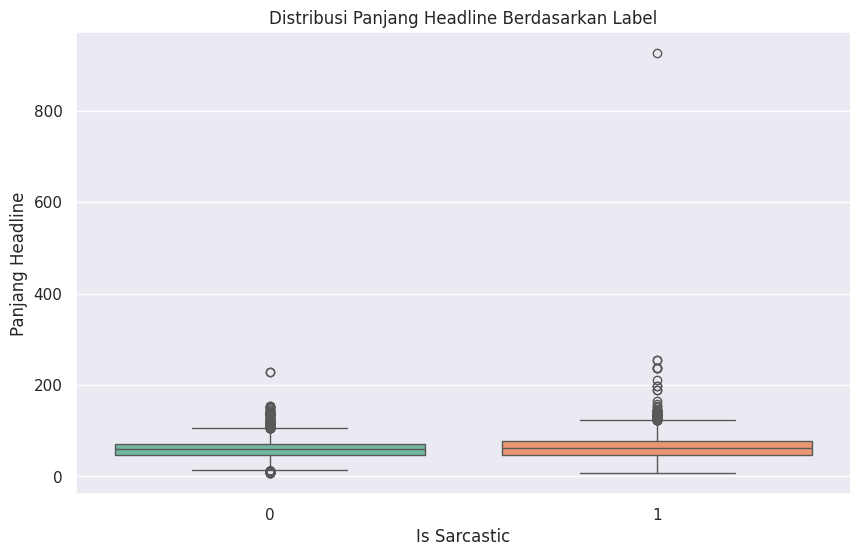

Panjang rata-rata headline:
is_sarcastic
0    59.558625
1    64.086206
Name: headline_length, dtype: float64
Kata paling umum di headline sarkasme:
[('to', 9121), ('of', 6921), ('in', 3857), ('for', 3152), ('on', 2339), ('man', 2164), ('with', 1862), ('new', 1794), ('by', 1310), ('the', 1272)]
Kata paling umum di headline non-sarkasme:
[('the', 9186), ('to', 8130), ('of', 4924), ('a', 4886), ('in', 4834), ('for', 3762), ('and', 3262), ('is', 2988), ('on', 2636), ('trump', 1914)]
Bigram paling umum di headline sarkasme:
[('area man', 452), ('out of', 359), ('to be', 354), ('to get', 237), ('study finds', 226), ('white house', 214), ('going to', 213), ('forced to', 146), ('of the', 144), ('to make', 143)]
Bigram paling umum di headline non-sarkasme:
[('donald trump', 648), ('in the', 602), ('of the', 548), ('how to', 400), ('to the', 324), ('to be', 316), ('on the', 294), ('and the', 288), ('is a', 266), ('for the', 260)]
Kata kunci yang lebih sering di headline sarkasme:
[('fucking', 16

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'df' is the dataset loaded
# Check if 'headline' and 'is_sarcastic' columns exist
if 'headline' in df.columns and 'is_sarcastic' in df.columns:

    # DISTRIBUSI PANJANG HEADLINE
    df['headline_length'] = df['headline'].apply(len)

    # Plot distribusi panjang headline
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='is_sarcastic', y='headline_length', data=df, palette='Set2')
    plt.title('Distribusi Panjang Headline Berdasarkan Label')
    plt.xlabel('Is Sarcastic')
    plt.ylabel('Panjang Headline')
    plt.show()

    # Analisis panjang rata-rata
    avg_length = df.groupby('is_sarcastic')['headline_length'].mean()
    print("Panjang rata-rata headline:")
    print(avg_length)

    # ANALISIS KATA DAN BIGRAM
    def generate_ngrams(text, n):
        """Generate n-grams from text."""
        words = text.split()
        return [" ".join(words[i:i+n]) for i in range(len(words)-n+1)]

    # Membagi data berdasarkan label
    sarcastic_headlines = df[df['is_sarcastic'] == 1]['headline']
    non_sarcastic_headlines = df[df['is_sarcastic'] == 0]['headline']

    # Frekuensi kata untuk sarkasme dan non-sarkasme
    sarcastic_words = Counter(" ".join(sarcastic_headlines).split())
    non_sarcastic_words = Counter(" ".join(non_sarcastic_headlines).split())

    print("Kata paling umum di headline sarkasme:")
    print(sarcastic_words.most_common(10))

    print("Kata paling umum di headline non-sarkasme:")
    print(non_sarcastic_words.most_common(10))

    # Bigrams
    sarcastic_bigrams = Counter([bigram for headline in sarcastic_headlines for bigram in generate_ngrams(headline, 2)])
    non_sarcastic_bigrams = Counter([bigram for headline in non_sarcastic_headlines for bigram in generate_ngrams(headline, 2)])

    print("Bigram paling umum di headline sarkasme:")
    print(sarcastic_bigrams.most_common(10))

    print("Bigram paling umum di headline non-sarkasme:")
    print(non_sarcastic_bigrams.most_common(10))

    # POLA KATA KUNCI
    # Mencari kata yang lebih sering muncul di headline sarkasme dibandingkan non-sarkasme
    all_words = set(sarcastic_words.keys()).union(set(non_sarcastic_words.keys()))
    keyword_ratios = {
        word: (sarcastic_words[word] + 1) / (non_sarcastic_words[word] + 1) for word in all_words
    }

    sorted_keywords = sorted(keyword_ratios.items(), key=lambda x: x[1], reverse=True)

    print("Kata kunci yang lebih sering di headline sarkasme:")
    print(sorted_keywords[:10])

else:
    print("Kolom 'headline' atau 'is_sarcastic' tidak ditemukan dalam dataset.")


#**PRE-PROCESSING**

In [50]:
df.isnull().sum()

,0
is_sarcastic,0
headline,0
article_link,0
subjectivity,0


In [51]:
df.drop('article_link', axis=1, inplace=True)

In [52]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def penn2morphy(penntag):
   """ Converts Penn Treebank tags to WordNet. """
   morphy_tag = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'}
   try:
       return morphy_tag[penntag[:2]]
   except:
       return 'n'

def preprocess_text(text):
   # Convert to lowercase
   text = text.lower()

   # Expand contractions
   text = contractions.fix(text)

   # Remove special characters and symbols
   text = re.sub(r"[^a-zA-Z0-9]", " ", text)

   # Tokenization
   tokens = word_tokenize(text)

   # Remove stop words
   stop_words = set(stopwords.words('english'))
   tokens = [token for token in tokens if token not in stop_words]

   # Lemmatization (using WordNet Lemmatizer)
   lemmatizer = WordNetLemmatizer()
   tokens = [lemmatizer.lemmatize(token, pos=penn2morphy(tag)) for token, tag in pos_tag(tokens)]

   # Rejoin tokens into a single string
   preprocessed_text = ' '.join(tokens)

   return preprocessed_text

# Apply preprocessing to the 'headline' column
df['processed_headline'] = df['headline'].apply(lambda x: preprocess_text(x))

# Display the DataFrame with the processed headline column
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,is_sarcastic,headline,subjectivity,processed_headline
0,0,former versace store clerk sues over secret 'b...,0.377778,former versace store clerk sue secret black co...
1,0,the 'roseanne' revival catches up to our thorn...,0.400000,roseanne revival catch thorny political mood w...
2,1,mom starting to fear son's web series closest ...,0.100000,mom start fear son web series closest thing gr...
3,1,"boehner just wants wife to listen, not come up...",0.100000,boehner want wife listen come alternative debt...
4,0,j.k. rowling wishes snape happy birthday in th...,0.833333,j k rowling wish snape happy birthday magical way


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55328 entries, 0 to 28618
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   is_sarcastic        55328 non-null  int64  
 1   headline            55328 non-null  object 
 2   subjectivity        55328 non-null  float64
 3   processed_headline  55328 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ MB


In [54]:
all_words = df['processed_headline'].str.split().tolist()
unique_words = [list(set(words)) for words in all_words]
# Flatten the list of lists into a single list
flat_list = [word for sublist in unique_words for word in sublist]

# Count the number of unique words
unique_word_count = len(set(flat_list))
print(flat_list[:10], unique_word_count)

['black', 'shopper', 'former', 'secret', 'minority', 'versace', 'sue', 'store', 'clerk', 'code'] 21216


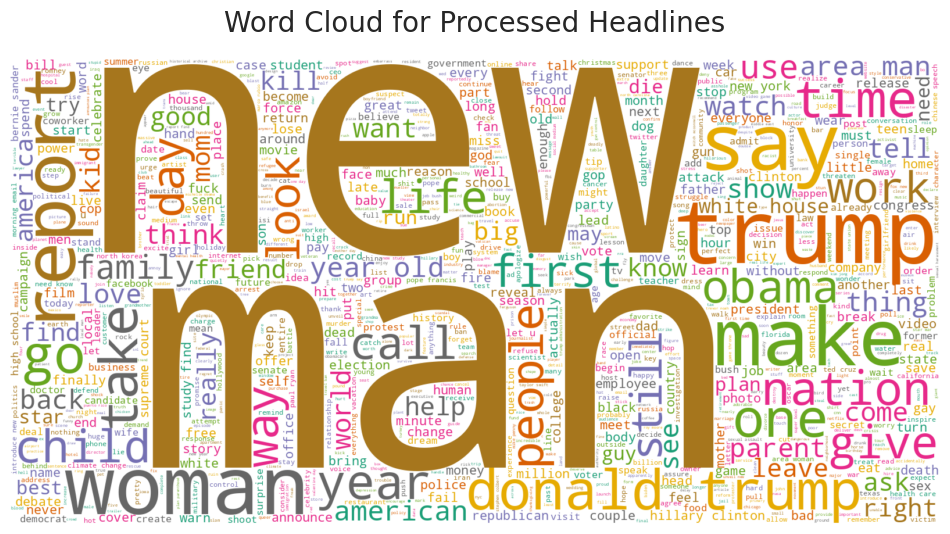

In [55]:
# Set a nice color palette
color_map = 'Dark2'

# Create a figure and set its size
plt.figure(figsize=(12, 8))

# Generate the word cloud
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',  # Background color
    colormap=color_map,        # Color scheme
    contour_color='black',     # Contour color
).generate(" ".join(df['processed_headline']))

# Display the word cloud with interpolation for smoother edges
plt.imshow(wc, interpolation='bilinear')

# Turn off axis
plt.axis('off')

# Add a title
plt.title('Word Cloud for Processed Headlines', fontsize=20, pad=20)

# Show the plot
plt.show()

#**Feature Extraction**

In [56]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=32768, ngram_range=(1, 4), tokenizer=nltk.word_tokenize)
X = vectorizer.fit_transform(df['processed_headline'])
y = df['is_sarcastic']
print(X[:10])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


  (0, 9709)	0.2640821402704284
  (0, 28123)	0.2798837128056576
  (0, 4977)	0.3465077362471415
  (0, 28397)	0.29807910525143455
  (0, 26348)	0.25949667859191194
  (0, 3191)	0.2258648825374936
  (0, 5143)	0.3273662447026032
  (0, 16363)	0.3341874454856089
  (0, 26850)	0.36433299845279865
  (0, 28124)	0.41601088232556754
  (1, 25640)	0.416968670053096
  (1, 25309)	0.37222590561776653
  (1, 4332)	0.293063460636767
  (1, 29373)	0.42262611857872706
  (1, 23395)	0.2862490170472802
  (1, 16623)	0.36240495135441175
  (1, 31777)	0.25848544230180076
  (1, 32413)	0.37814732963116715
  (2, 16507)	0.21555664412611503
  (2, 27809)	0.23312858156299981
  (2, 8986)	0.2634480357654749
  (2, 27413)	0.23812113145728378
  (2, 31684)	0.3156291372649445
  (2, 26577)	0.27103285797870375
  (2, 5081)	0.3824561946511874
  :	:
  (7, 5352)	0.2523132356929041
  (7, 4446)	0.4131717308891425
  (7, 26525)	0.3996897668642121
  (7, 13648)	0.4131717308891425
  (7, 26174)	0.3815793657229506
  (8, 29672)	0.278788914539593
 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (44262, 32768)
X_test shape: (11066, 32768)
y_train shape: (44262,)
y_test shape: (11066,)


In [ ]:
# Define the parameter grid
# param_dist = {
#     'C': [0.1, 1, 10, 100, 1000],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga']
# }

# Create a RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     estimator=LogisticRegression(),
#     param_distributions=param_dist,
#     n_iter=10,  # Number of random combinations to try
#     cv=5,
#     verbose=1,
#     n_jobs=-1
# )

# Fit the RandomizedSearchCV object to the data
# random_search.fit(X_train, y_train)

# Print the best parameters
# print(random_search.best_params_)

# Set the model with the best parameters
# model = random_search.best_estimator_

In [58]:
model = LogisticRegression(solver='saga', penalty='l2', C=100)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=100, solver='saga')

In [59]:
y_pred = model.predict(X_test)
print(y_pred[:10])

[0 0 1 0 0 1 0 0 1 1]


#**Evaluate**

In [60]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Print the cross-validated scores
print("Cross-validated Scores:", cv_scores)

# Print the mean and standard deviation of the cross-validated scores
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Scores: {cv_scores.std():.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-validated Scores: [0.99593349 0.99584312 0.94722574 0.98065974 0.98065974]
Mean CV Score: 0.9801
Standard Deviation of CV Scores: 0.0178


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [61]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[5802,  206],
       [ 298, 4760]])

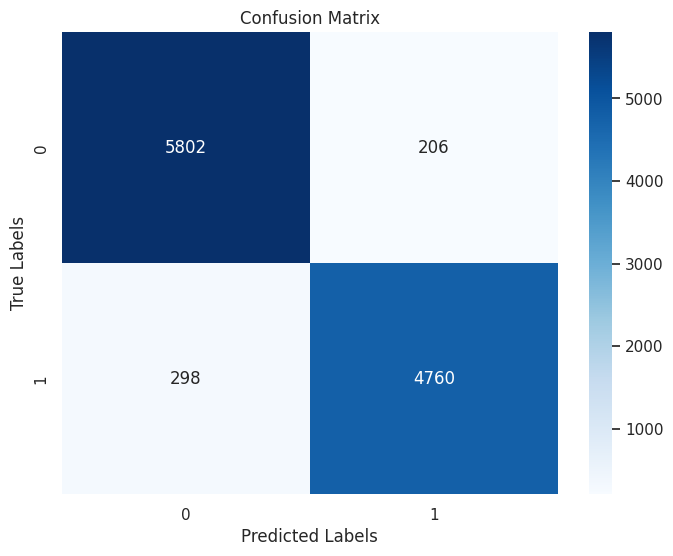

In [62]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [63]:
# evaluate
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6008
           1       0.96      0.94      0.95      5058

    accuracy                           0.95     11066
   macro avg       0.95      0.95      0.95     11066
weighted avg       0.95      0.95      0.95     11066

0.9544550876558829


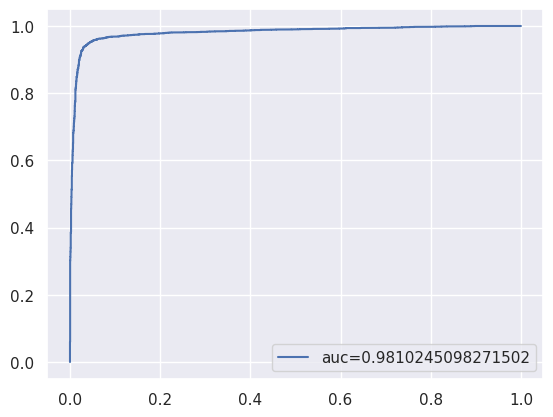

AUC: 0.9810245098271502


In [64]:
# ROC Curve
y_pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print('AUC:', auc)

In [65]:
# Create predict one function
def predict_one(text):
    # Preprocess the text
    preprocessed_text = preprocess_text(text)

    # Vectorize the preprocessed text
    vectorized_text = vectorizer.transform([preprocessed_text])

    # Make a prediction
    prediction = model.predict(vectorized_text)

    # Return the prediction
    return prediction[0]
# test predict one function

In [66]:
# Test the predict_one function with an example text
example_text = "New Study Reveals That Sleeping Eight Hours a Day Makes You Well-Rested"
prediction_result = predict_one(example_text)

# Print the result
print(f'Text: {example_text}')
print(f'Prediction: {prediction_result}')

Text: New Study Reveals That Sleeping Eight Hours a Day Makes You Well-Rested
Prediction: 1


In [67]:
# Test the predict_one function with an example text
example_text = "Health Officials Launch Campaign to Promote Vaccination Awareness"
prediction_result = predict_one(example_text)

# Print the result
print(f'Text: {example_text}')
print(f'Prediction: {prediction_result}')

Text: Health Officials Launch Campaign to Promote Vaccination Awareness
Prediction: 0
